In [1]:
#Load and Explore Data
# import libraries 
import pandas as pd 
import numpy as np
from sklearn.datasets import load_breast_cancer
#load dataset
cancer = load_breast_cancer(as_frame = True)
#create DataFrame 
df = cancer.frame
# Feaotures and target
x= df[cancer ['feature_names']]
y= df['target']
# Display shape 
print (f"Input Shape : {x.shape}, Target Shape:{y.shape}")

Input Shape : (569, 30), Target Shape:(569,)


In [3]:
# Standardize The Data
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [5]:
# Perform PCA
from sklearn.decomposition import PCA
#Apply PCA to reduce to 2 components 
pca = PCA(n_components=2)
x_pca = pca.fit_transform (x_scaled)
# Display explained variance ratio
print (f" Explained Variance Ratio: {pca.explained_variance_ratio_}")

 Explained Variance Ratio: [0.44272026 0.18971182]


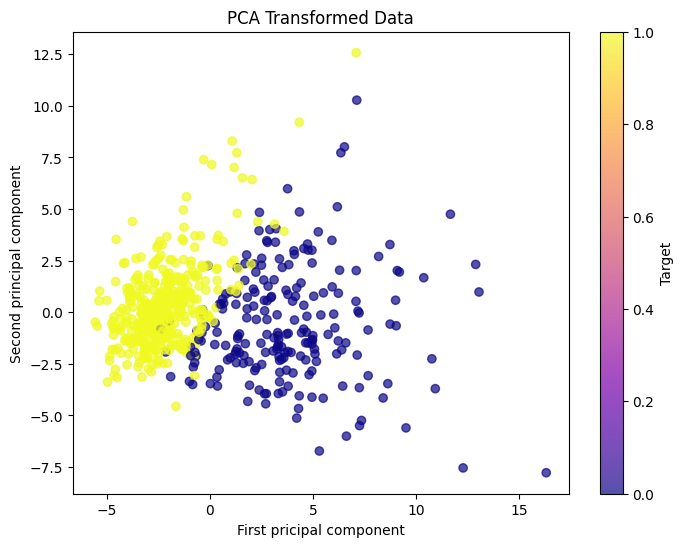

In [7]:
# Visualize PCA-Reduced Data
import matplotlib.pyplot as plt
# Plot CPA results
plt.figure (figsize =(8, 6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap = 'plasma', alpha=0.7)
plt.title('PCA Transformed Data')
plt.xlabel('First pricipal component')
plt.ylabel('Second principal component')
plt.colorbar(label = 'Target')
plt.show()

In [13]:
# Logistic Regression 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_pca , y, test_size = 0.2 , random_state = 42)

# Train logistic regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

#Make predictions
y_pred = log_reg.predict(x_test)

#Evaluate performance 
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix (y_test, y_pred)
print(f'Accurancy:{accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accurancy:0.9912280701754386
Confusion Matrix:
[[42  1]
 [ 0 71]]


In [17]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, y_pred, target_names = cancer.target_names)
print('Classification Report:\n',report)

Classification Report:
               precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        43
      benign       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



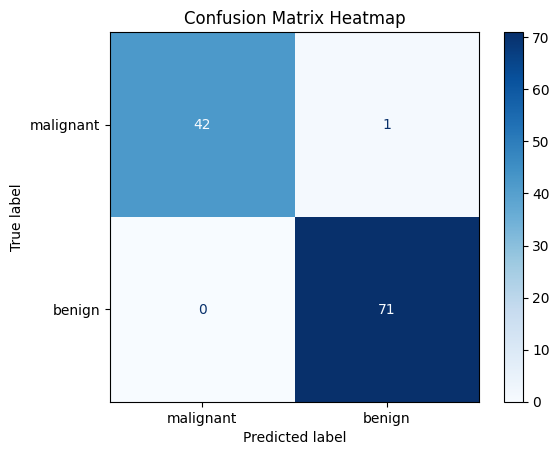

In [23]:
# Visualize the performance of our model 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display the confusion matrix as a heatmap

disp = ConfusionMatrixDisplay( conf_matrix, display_labels = cancer.target_names)
disp.plot( cmap = 'Blues' , values_format = 'd')
plt.title('Confusion Matrix Heatmap')
plt.show()

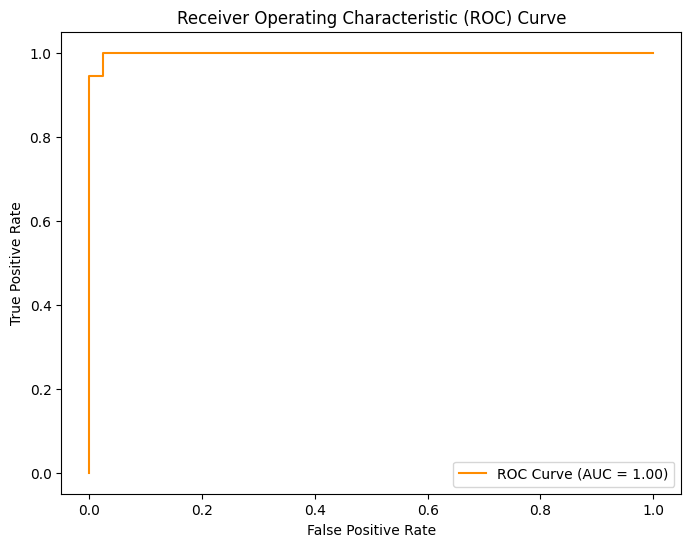

In [27]:
# ROC Curve 
from sklearn.metrics import roc_curve, roc_auc_score
# Get predicted probabilities for the positive class
y_prob= log_reg.predict_proba(x_test)[:,1]
# Calculate the Roc curve
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize= (8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


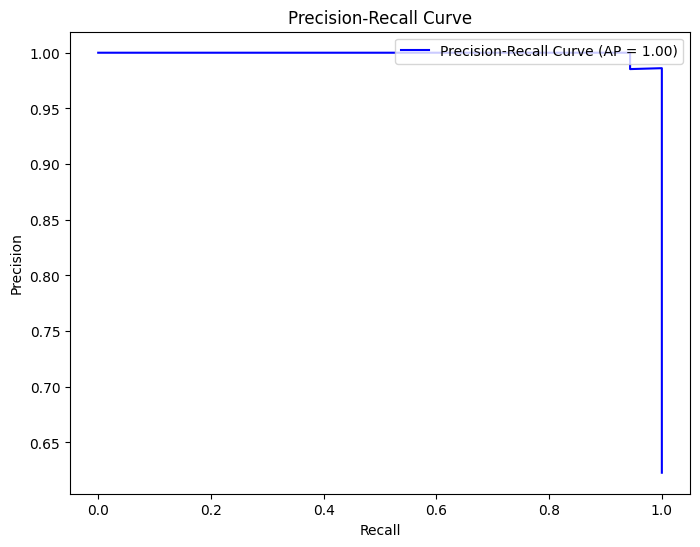

In [39]:
# Precision Recall curve 

from sklearn.metrics import precision_recall_curve, average_precision_score
# Calculate precision-recall values 

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {average_precision:.2f})", color='blue')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right")
plt.show()